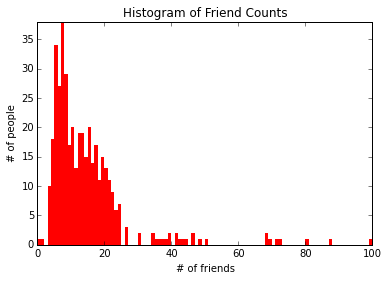

414 99 0
0 1 99


In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
from numpy.random import poisson
from collections import Counter

# our fake data: number of friends per user on Data Sciencester
num_friends = list(poisson(7, 213)) + list(poisson(17, 176)) + list(poisson(42, 17)) + list(poisson(72, 7)) + [99]

# making histogram plot of number of friends per user
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys, edgecolor='none', width=1, color='r')
plt.axis([0, max(xs), 0, max(ys)])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

# truly "basic" stats on the above data
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
print(num_points, largest_value, smallest_value)

# more basic stats
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-1]
print(smallest_value, second_smallest_value, second_largest_value)
